In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

## multiple plots on one graph

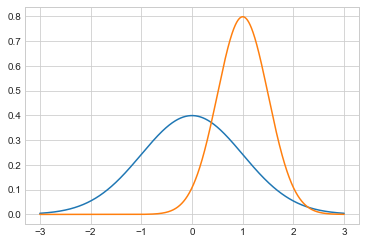

In [4]:
from scipy.stats import norm

x = np.arange(-3, 3, 0.001)
plt.plot(x, norm.pdf(x))
plt.plot(x, norm.pdf(x, 1, 0.5));

## adjust the axes

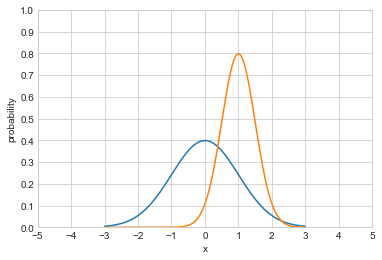

In [10]:
axes = plt.axes()
axes.set_xlim(-5, 5)
axes.set_ylim(0, 1.0)
axes.set_xticks(np.arange(-5, 6))
axes.set_yticks(np.arange(0, 1.1, 0.1))

plt.xlabel("x")
plt.ylabel("probability")
plt.plot(x, norm.pdf(x))
plt.plot(x, norm.pdf(x, 1, 0.5));

## XKCD style

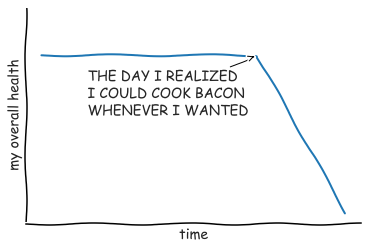

In [14]:
plt.xkcd()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines["right"].set_color(None)
ax.spines["top"].set_color(None)
plt.xticks([])
plt.yticks([])
ax.set_ylim([-30, 10])

data = np.ones(100)
data[70:] -= np.arange(30)

plt.annotate(
    "THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED",
    xy=(70, 1), arrowprops=dict(arrowstyle="->"), xytext=(15, -10))

plt.plot(data)
plt.xlabel("time")
plt.ylabel("my overall health");

## pie chart

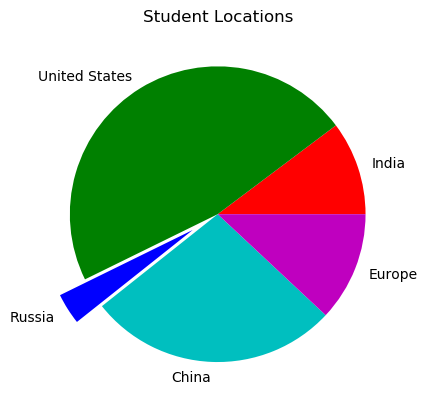

In [20]:
plt.rcdefaults()

values = [12, 55, 4, 32, 14]
colors = ["r", "g", "b", "c", "m"]
explode = [0, 0, 0.2, 0, 0]
labels = ["India", "United States", "Russia", "China", "Europe"]
plt.pie(values, colors=colors, labels=labels, explode=explode)
plt.title("Student Locations");

## bar chart

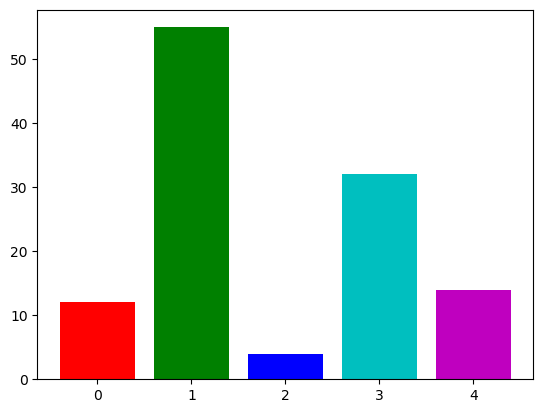

In [22]:
values = [12, 55, 4, 32, 14]
colors = ["r", "g", "b", "c", "m"]
plt.bar(range(0, 5), values, color=colors);

## scatter plot

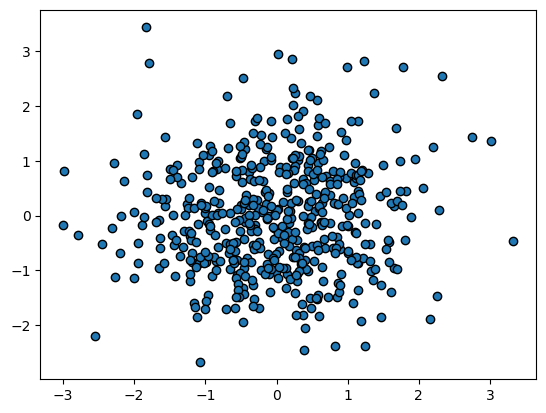

In [24]:
x = np.random.randn(500)
y = np.random.randn(500)
plt.scatter(x, y, edgecolor="k");

## box & whisker plot

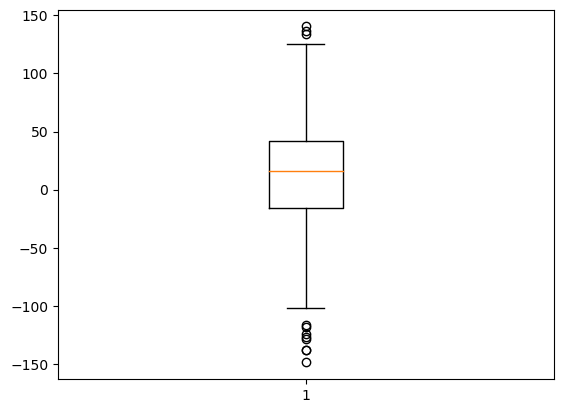

In [32]:
uniform_skewed = np.random.rand(100) * 100 - 40
high_outliers = np.random.rand(10) * 50 + 100
low_outliers = np.random.rand(10) * -50 - 100
data = np.concatenate([uniform_skewed, high_outliers, low_outliers])
plt.boxplot(data);

# Using Seaborn

In [35]:
import seaborn as sns
import pandas as pd

In [36]:
df = pd.read_csv("http://media.sundog-soft.com/SelfDriving/FuelEfficiency.csv")
df.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


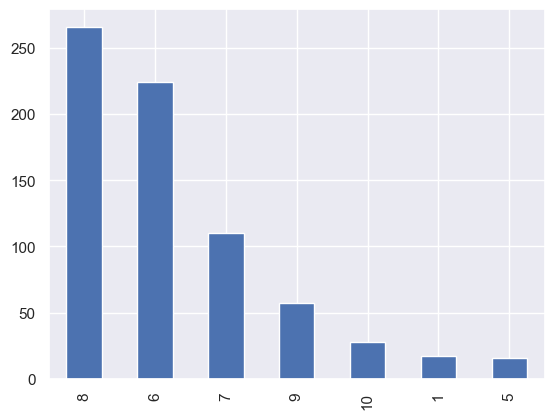

In [40]:
sns.set()
gear_counts = df["# Gears"].value_counts()
gear_counts.plot(kind="bar");

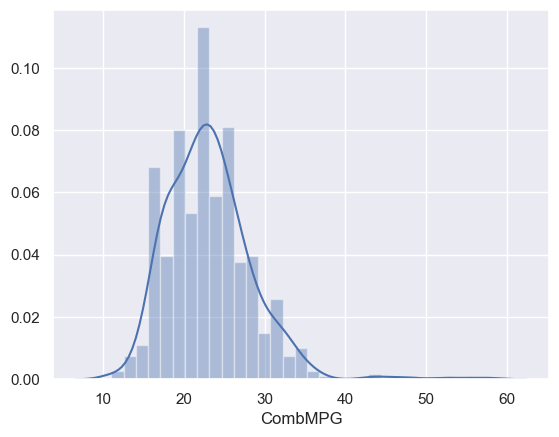

In [42]:
sns.distplot(df["CombMPG"]);

In [45]:
df2 = df[["Cylinders", "CityMPG", "HwyMPG", "CombMPG"]]
df2.head()

,Cylinders,CityMPG,HwyMPG,CombMPG
0,8,18,25,21
1,16,9,14,11
2,8,12,20,15
3,8,15,25,18
4,8,14,23,17


4     323
6     243
8     127
3      14
12     10
16      1
Name: Cylinders, dtype: int64

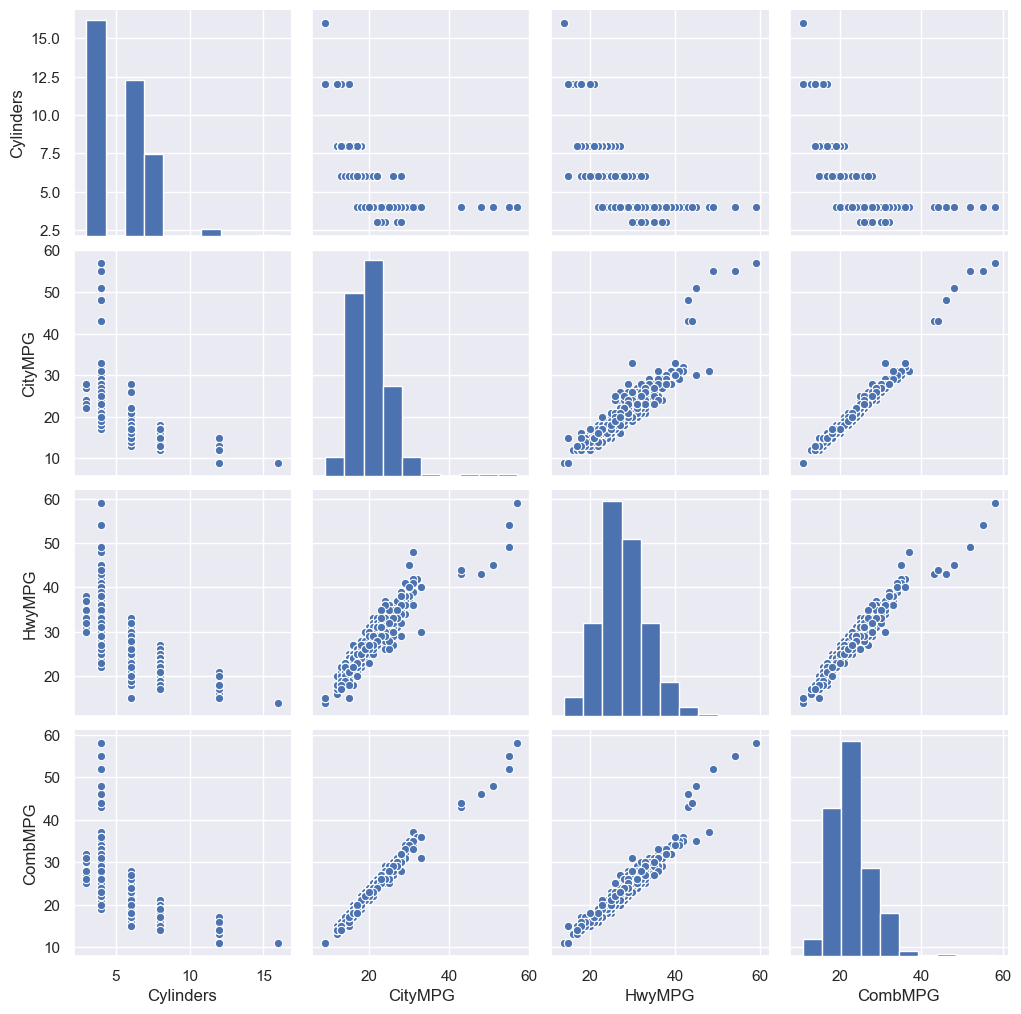

In [53]:
sns.pairplot(df2, height=2.5);

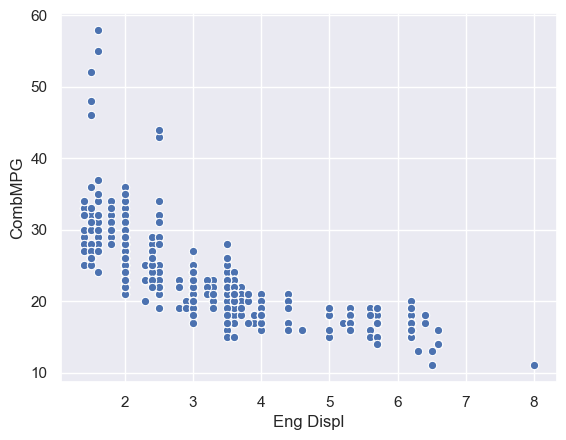

In [55]:
sns.scatterplot(x="Eng Displ", y="CombMPG", data=df);

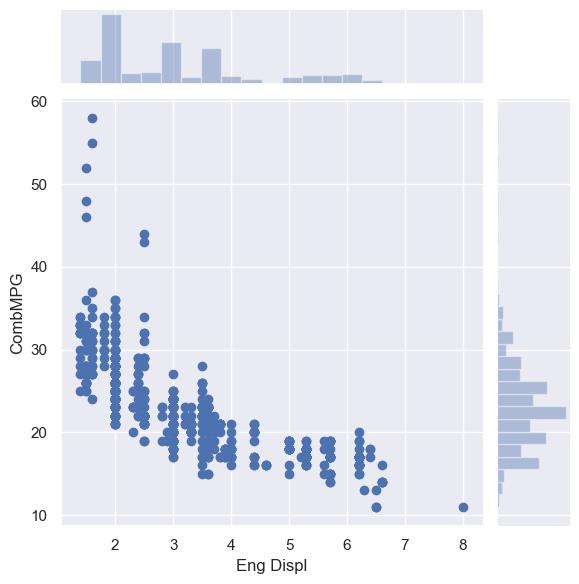

In [57]:
sns.jointplot(x="Eng Displ", y="CombMPG", data=df);

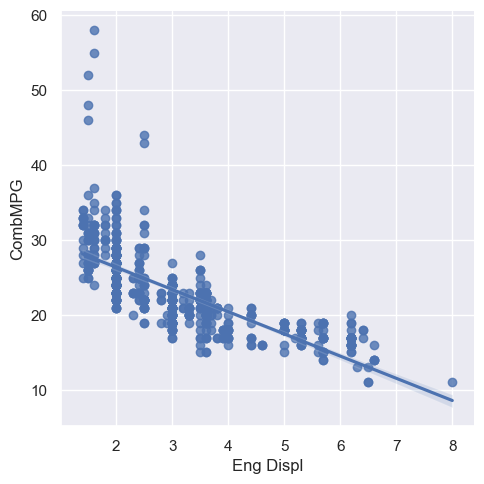

In [58]:
sns.lmplot(x="Eng Displ", y="CombMPG", data=df);

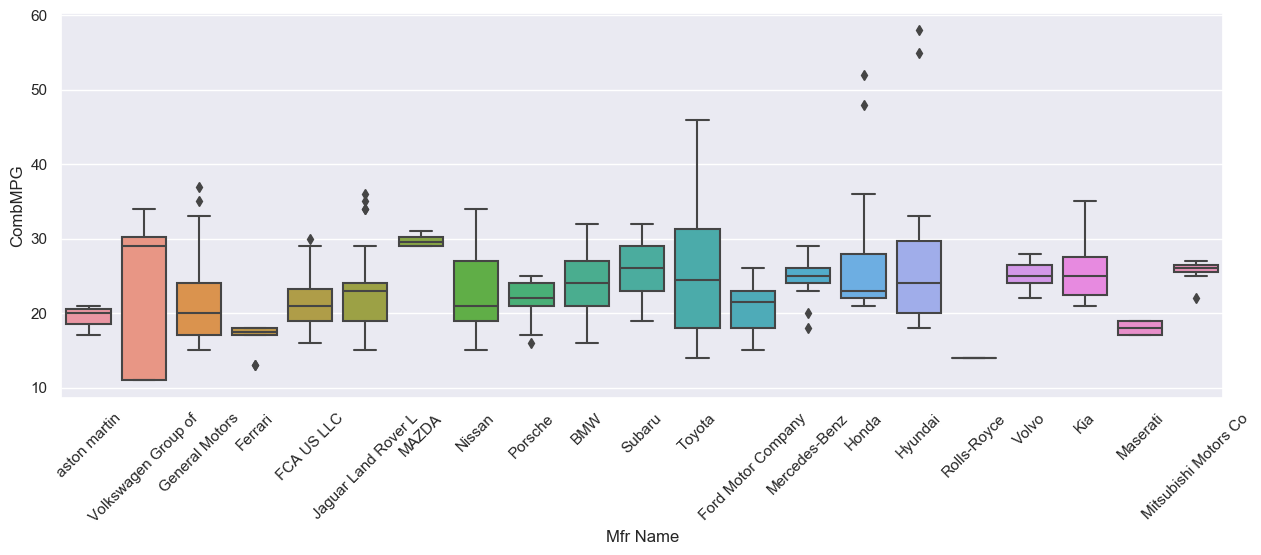

In [60]:
sns.set(rc={"figure.figsize": (15, 5)})
ax = sns.boxplot(x="Mfr Name", y="CombMPG", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

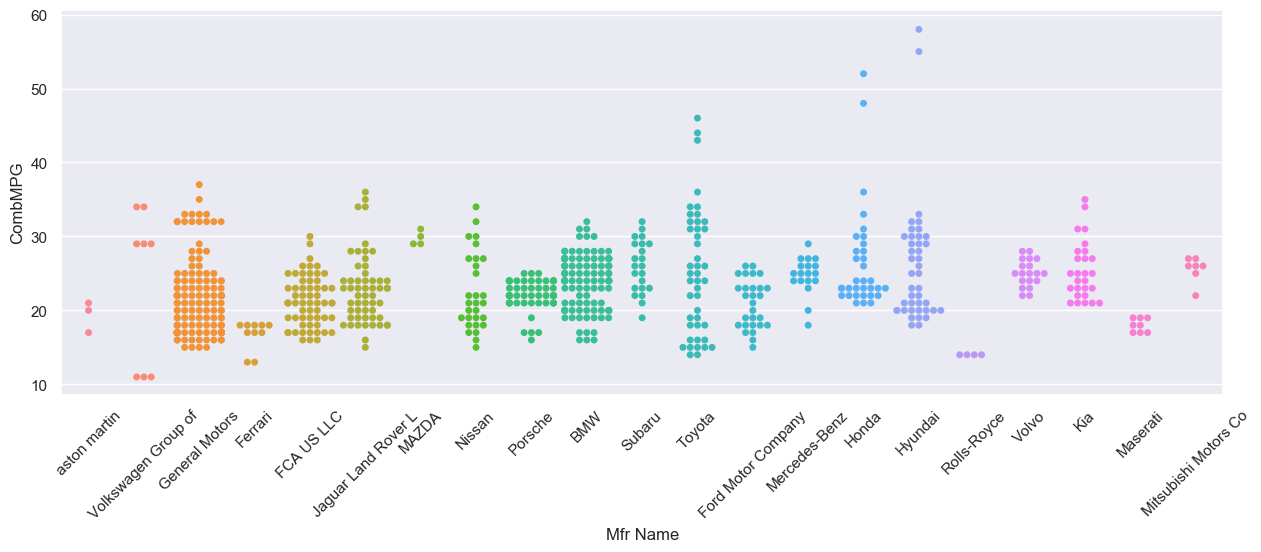

In [61]:
sns.set(rc={"figure.figsize": (15, 5)})
ax = sns.swarmplot(x="Mfr Name", y="CombMPG", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

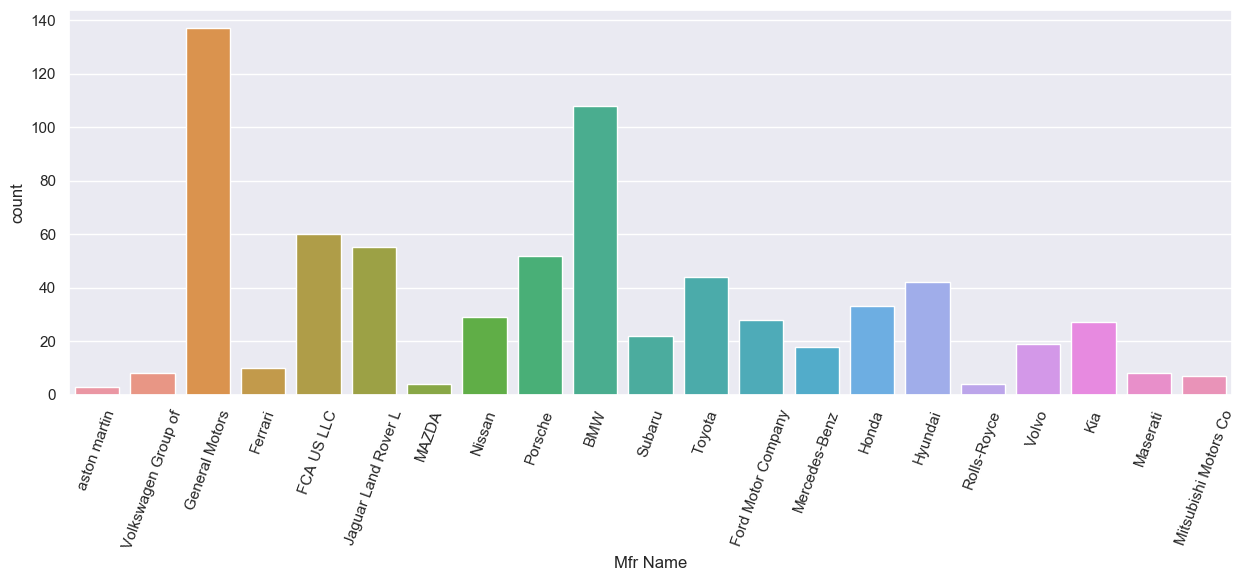

In [63]:
ax = sns.countplot(x="Mfr Name", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

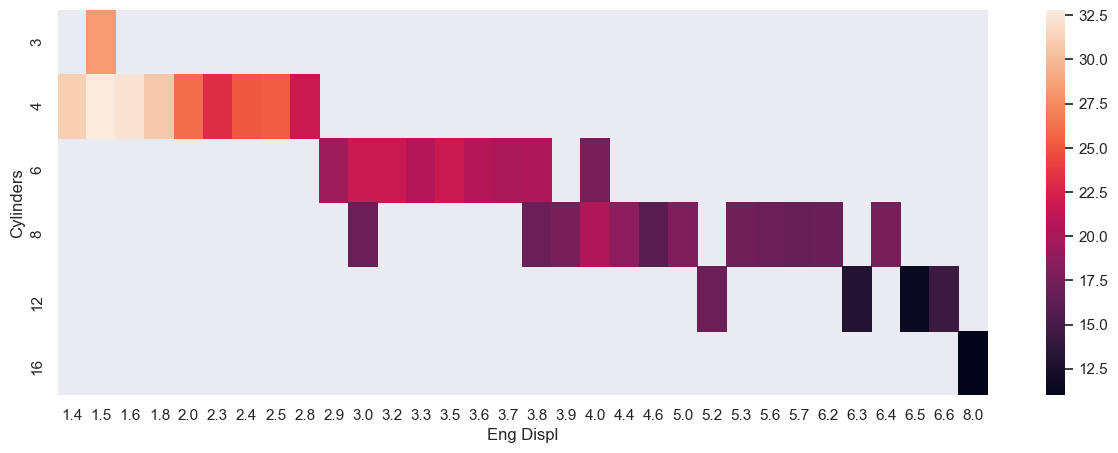

In [67]:
df2 = df.pivot_table(index="Cylinders", columns="Eng Displ", values="CombMPG", aggfunc="mean")
sns.heatmap(df2);